In [29]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus as dot
from IPython.display import SVG
from projet_madi import *

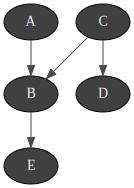

In [30]:
%reload_ext autoreload
%autoreload 2
bn=gum.fastBN("A->B<-C->D->E<-B")
bn.eraseArc("D","E")
gnb.showBN(bn)

In [31]:
%reload_ext autoreload
%autoreload 2
for i in bn.nodes():
    print("variable {} : {}".format(i,bn.variable(i)))
print()
for i in bn.nodes():
    print("cpt {} : {}".format(i,bn.cpt(i)))

variable 0 : A[0,1]
variable 1 : B[0,1]
variable 2 : C[0,1]
variable 3 : D[0,1]
variable 4 : E[0,1]

cpt 0 : <A:0> :: 0.520393 /<A:1> :: 0.479607
cpt 1 : <B:0|A:0|C:0> :: 0.453607 /<B:1|A:0|C:0> :: 0.546393 /<B:0|A:1|C:0> :: 0.420867 /<B:1|A:1|C:0> :: 0.579133 /<B:0|A:0|C:1> :: 0.177529 /<B:1|A:0|C:1> :: 0.822471 /<B:0|A:1|C:1> :: 0.889351 /<B:1|A:1|C:1> :: 0.110649
cpt 2 : <C:0> :: 0.352271 /<C:1> :: 0.647729
cpt 3 : <D:0|C:0> :: 0.531199 /<D:1|C:0> :: 0.468801 /<D:0|C:1> :: 0.178343 /<D:1|C:1> :: 0.821657
cpt 4 : <E:0|B:0> :: 0.27767 /<E:1|B:0> :: 0.72233 /<E:0|B:1> :: 0.370293 /<E:1|B:1> :: 0.629707


In [32]:
bn.cpt(3)
#cpt = gum.Potential(bn.cpt(3));
#cpt.fillWith(0);
#cpt[0] = 1;
#gnb.showPotential(cpt)



(gum::Potential<double>@0x7f9ddb7935f0) <D:0|C:0> :: 0.531199 /<D:1|C:0> :: 0.468801 /<D:0|C:1> :: 0.178343 /<D:1|C:1> :: 0.821657

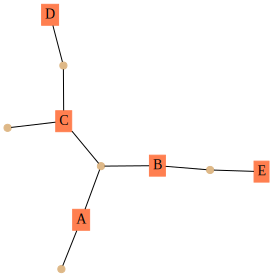

In [33]:
bn=gum.fastBN("A->B<-C->D->E<-B")
bn.eraseArc("D","E")
gf = FactorGraph();
gf.build(bn);
g=dot.graph_from_dot_data(gf.show())
SVG(g.create_svg())

In [34]:
#import pyAgrum as gum
#import pyAgrum.lib.notebook as gnb

#a,b,c=[gum.LabelizedVariable(s,s,2) for s in "abc"]
#p1=gum.Potential().add(a).add(b).fillWith([1,2,3,4]).normalize()
#p2=gum.Potential().add(b).add(c).fillWith([4,5,2,3]).normalize()

#gnb.sideBySide(p1,p2,p1+p2,
#              captions=['p1','p2','p1+p2'])

In [35]:
%reload_ext autoreload
%autoreload 2
print("Exo:")
spi=TreeSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))
#spi.posterior("A")          # retourne la distribution de 'A' sous la forme d'un `gum.Potential`

# pour comparer
print("Inference dans PyAgrum:")
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))



Exo:


Inference dans PyAgrum:



\
\
LBPSumProductInference   ADDEvidence TEST

In [53]:

# pour comparer
print("Inference dans PyAgrum:")
ie=gum.LazyPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
gnb.showPotential(ie.posterior(4))

Inference dans PyAgrum:


name C label 1
dingdingding node_id= 2  name = C  
name D label 0
dingdingding node_id= 3  name = D  


graph


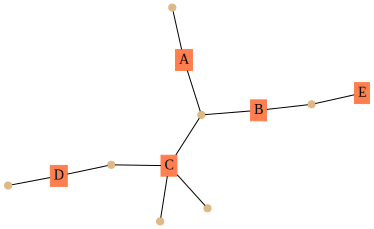

In [54]:
spi=TreeSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})

spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(4))
print("graph")
g=dot.graph_from_dot_data(spi.fg.show())
SVG(g.create_svg())



\ 
\
\
\
LBPSumProductInference  TEST

In [61]:
# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))

Inference LBP dans PyAgrum:


In [62]:
%reload_ext autoreload
%autoreload 2

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))

Exo LBPSumproductInference:


\
\
\
LBP  TEST

In [65]:
# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
gnb.showPotential(ie.posterior(4))

Inference LBP dans PyAgrum:


In [70]:
%reload_ext autoreload
%autoreload 2

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(4))


Exo LBPSumproductInference:
